<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/tips_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [2]:
tips = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv')
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [3]:
tips.drop(['Unnamed: 0'],inplace=True, axis = 1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

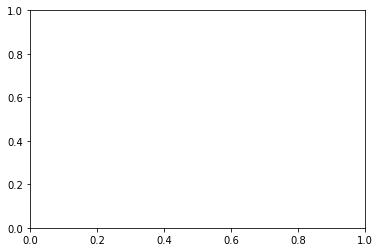

In [4]:
fig = plt.figure()
tips_hist = fig.add_subplot(1,1,1)

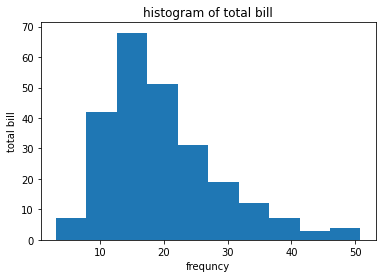

In [5]:
tips_hist.hist(tips['total_bill'], bins=10)
tips_hist.set_title("histogram of total bill")
tips_hist.set_xlabel('frequncy')
tips_hist.set_ylabel('total bill')

fig

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

Text(0, 0.5, 'tip')

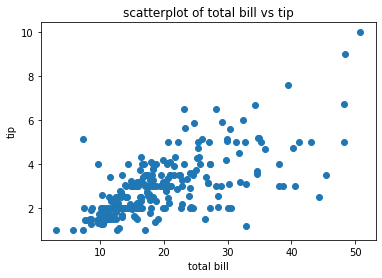

In [6]:
scatter_plot = plt.figure()
tips_scatter = scatter_plot.add_subplot(1,1,1)
tips_scatter.scatter(tips['total_bill'],tips['tip'])
tips_scatter.set_title('scatterplot of total bill vs tip')
tips_scatter.set_xlabel('total bill')
tips_scatter.set_ylabel('tip')

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

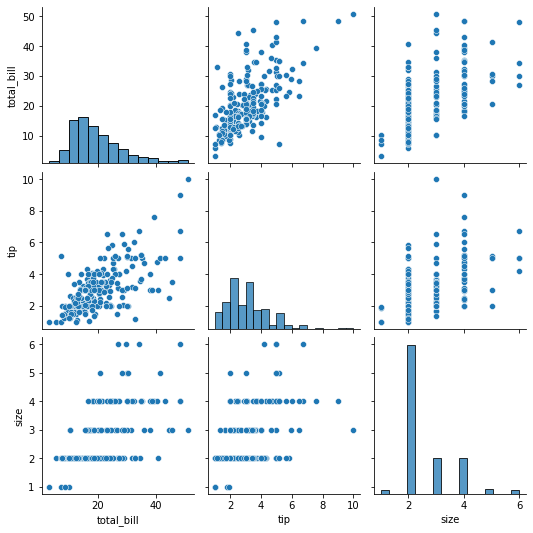

In [7]:
fig = sns.pairplot(tips)

### Step 8. Present the relationship between days and total_bill value

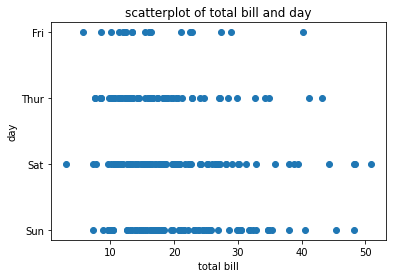

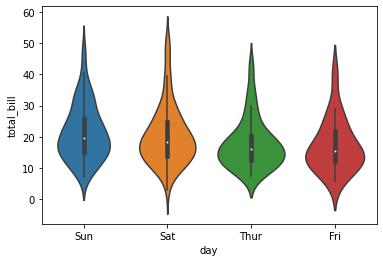

In [8]:
scatter_plot = plt.figure()
tips_scatter2 = scatter_plot.add_subplot(1,1,1)
tips_scatter2.scatter(tips['total_bill'],tips['day'])
tips_scatter2.set_title('scatterplot of total bill and day')
tips_scatter2.set_xlabel('total bill')
tips_scatter2.set_ylabel('day')

# day는 범주형, total_bill은 연속형 변수 이므로 아래와 같은 표현도 보기 좋을 것이라 예상됨
tips_vio = plt.subplots()
tips_vio = sns.violinplot(x='day',y='total_bill',data=tips)

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

In [9]:
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 2
    
tips['sex_color'] = tips['sex'].apply(recode_sex)

Text(0, 0.5, 'day')

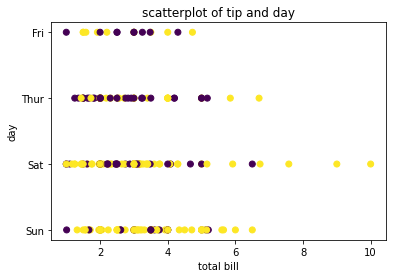

In [10]:
scatter_plot = plt.figure()
tips_scatter2 = scatter_plot.add_subplot(1,1,1)
tips_scatter2.scatter(x=tips['tip'],y=tips['day'],c=tips['sex_color'])
tips_scatter2.set_title('scatterplot of tip and day')
tips_scatter2.set_xlabel('total bill')
tips_scatter2.set_ylabel('day')

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

Text(0, 0.5, 'Average total bill')

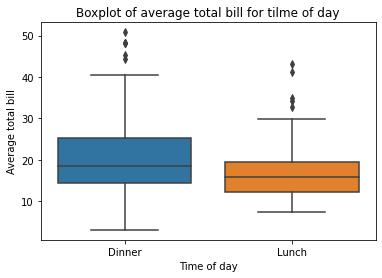

In [11]:
tips_box = plt.subplots()
tips_box = sns.boxplot(x='time',y='total_bill',data=tips)
tips_box.set_title('Boxplot of average total bill for tilme of day')
tips_box.set_xlabel('Time of day')
tips_box.set_ylabel('Average total bill')

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


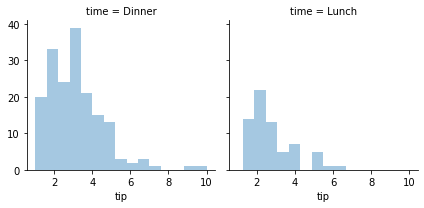

In [28]:
tips_two_hist=sns.FacetGrid(tips, col='time')
tips_two_hist.map(sns.distplot, 'tip', kde=False)

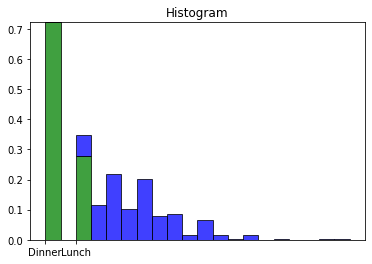

In [26]:
plt.hist([tips['time'],tips['tip']], 20, density = True, color=['g','b'], histtype='barstacked', alpha=0.75, edgecolor='k')
 
plt.title('Histogram')
plt.show()

# 그냥 다른 방법 연습해봄

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

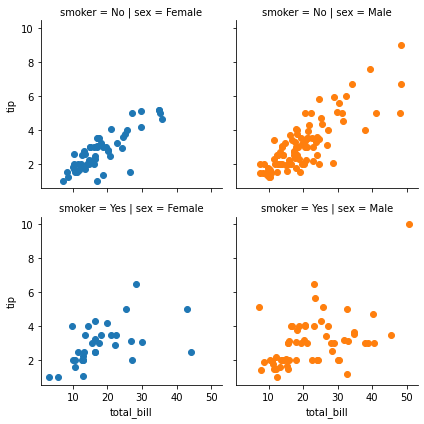

In [30]:
tips_scatter_var = sns.FacetGrid(tips, col='sex', row='smoker', hue='sex') 
tips_scatter_var.map(plt.scatter, 'total_bill', 'tip')

### BONUS: Create your own question and answer it using a graph.

육각형 그래프로 나타내보시오.

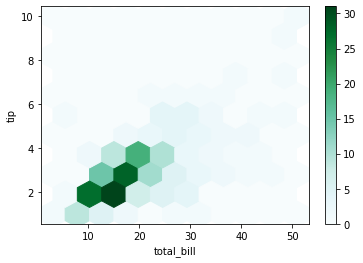

In [35]:
fig, tips_h = plt.subplots()
tips_h = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=tips_h)